In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = '/Users/jack/Desktop/DataVisHomework/DataVisHomework/MatplotlibHomework/Resources/mouse_drug_data.csv'
clinical_trial_data_to_load = '/Users/jack/Desktop/DataVisHomework/DataVisHomework/MatplotlibHomework/Resources/clinicaltrial_data.csv'

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
merged_data_df = pd.merge(mouse_df, clinical_trial_df, on = 'Mouse ID')

# Display the data table for preview
merged_data_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
timepoint = merged_data_df['Timepoint'].unique() 

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

by_drug_time = merged_data_df.groupby(['Drug', 'Timepoint'])
by_drug_time.head()

summary = by_drug_time['Tumor Volume (mm3)'].mean()

summary_df = pd.DataFrame(summary)
summary_df = summary_df.reset_index()


In [4]:
loc_capomulin = summary_df.loc[summary_df['Drug'] == 'Capomulin']
capomulin = loc_capomulin['Tumor Volume (mm3)']
standard_errors_capomulin = capomulin.sem()

# loc_ceftamin = summary_df.loc[summary_df['Drug'] == 'Ceftamin']
# ceftamin = loc_ceftamin['Tumor Volume (mm3)']
# standard_errors_ceftamin = ceftamin.sem()

loc_infubinol = summary_df.loc[summary_df['Drug'] == 'Infubinol']
infubinol = loc_infubinol['Tumor Volume (mm3)']
standard_errors_infubinol = infubinol.sem()

loc_ketapril = summary_df.loc[summary_df['Drug'] == 'Ketapril']
ketapril = loc_ketapril['Tumor Volume (mm3)']
standard_errors_ketapril = ketapril.sem()

# loc_naftisol = summary_df.loc[summary_df['Drug'] == 'Naftisol']
# naftisol = loc_naftisol['Tumor Volume (mm3)']
# standard_errors_naftisol = naftisol.sem()

loc_placebo = summary_df.loc[summary_df['Drug'] == 'Placebo']
placebo = loc_placebo['Tumor Volume (mm3)']
standard_errors_placebo = placebo.sem()

# loc_propriva = summary_df.loc[summary_df['Drug'] == 'Propriva']
# propriva = loc_propriva['Tumor Volume (mm3)']
# standard_errors_propriva = propriva.sem()

# loc_ramicane = summary_df.loc[summary_df['Drug'] == 'Ramicane']
# ramicane = loc_ramicane['Tumor Volume (mm3)']
# standard_errors_ramicane = ramicane.sem()

# loc_stelasyn = summary_df.loc[summary_df['Drug'] == 'Stelasyn']
# stelasyn = loc_stelasyn['Tumor Volume (mm3)']
# standard_errors_stelasyn = stelasyn.sem()

# loc_zoniferol = summary_df.loc[summary_df['Drug'] == 'Zoniferol']
# zoniferol = loc_zoniferol['Tumor Volume (mm3)']
# standard_errors_zoniferol = zoniferol.sem()

<IPython.core.display.Javascript object>


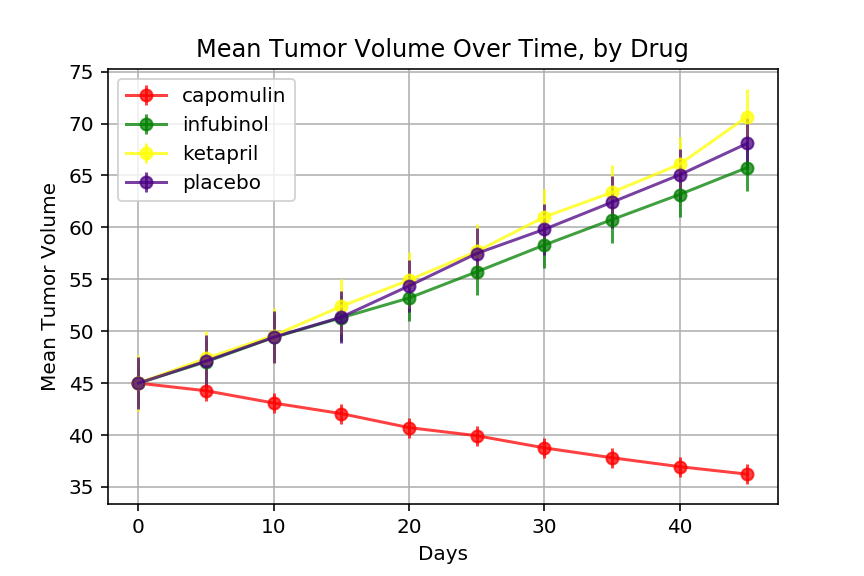

In [18]:
%matplotlib notebook

fig, ax = plt.subplots()
ax.errorbar(timepoint, capomulin, standard_errors_capomulin, marker="o", color="red", label = 'capomulin', alpha=0.75)
# ax.errorbar(timepoint, ceftamin , standard_errors_ceftamin, marker="o", color="blue", alpha=0.75)
ax.errorbar(timepoint, infubinol , standard_errors_infubinol, marker="o", color="green", label = 'infubinol', alpha=0.75)
ax.errorbar(timepoint, ketapril , standard_errors_ketapril, marker="o", color="yellow", label = 'ketapril', alpha=0.75)
# ax.errorbar(timepoint, naftisol , standard_errors_naftisol, marker="o", color="orange", alpha=0.75)
ax.errorbar(timepoint, placebo , standard_errors_placebo, marker="o", color="indigo", label = 'placebo', alpha=0.75)
# ax.errorbar(timepoint, propriva , standard_errors_propriva, marker="o", color="violet", alpha=0.75)
# ax.errorbar(timepoint, ramicane , standard_errors_ramicane, marker="o", color="grey", alpha=0.75)
# ax.errorbar(timepoint, stelasyn , standard_errors_stelasyn, marker="o", color="c0", alpha=0.75)
# ax.errorbar(timepoint, zoniferol , standard_errors_zoniferol, marker="o", color="c1", alpha=0.75)

ax.legend()
ax.grid(True)

plt.title('Mean Tumor Volume Over Time, by Drug')
plt.xlabel('Days')
plt.ylabel('Mean Tumor Volume')

plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

by_ms_time = merged_data_df.groupby(['Drug', 'Timepoint'])
by_ms_time.head()

summary_ms = by_ms_time['Metastatic Sites'].mean()
summary_ms

summary_ms_df = pd.DataFrame(summary_ms)
summary_ms_df = summary_ms_df.reset_index()

In [7]:
loc_ms_capomulin = summary_ms_df.loc[summary_ms_df['Drug'] == 'Capomulin']
capomulin_ms = loc_ms_capomulin['Metastatic Sites']
standard_errors_capomulin_ms = capomulin_ms.sem()

# loc_ms_ceftamin = summary_ms_df.loc[summary_ms_df['Drug'] == 'Ceftamin']
# ceftamin_ms = loc_ms_ceftamin['Metastatic Sites']
# standard_errors_ceftamin_ms = ceftamin_ms.sem()

loc_ms_infubinol = summary_ms_df.loc[summary_ms_df['Drug'] == 'Infubinol']
infubinol_ms = loc_ms_infubinol['Metastatic Sites']
standard_errors_infubinol_ms = infubinol_ms.sem()

loc_ms_ketapril = summary_ms_df.loc[summary_ms_df['Drug'] == 'Ketapril']
ketapril_ms = loc_ms_ketapril['Metastatic Sites']
standard_errors_ketapril_ms = ketapril_ms.sem()

# loc_ms_naftisol = summary_ms_df.loc[summary_ms_df['Drug'] == 'Naftisol']
# naftisol_ms = loc_ms_naftisol['Metastatic Sites']
# standard_errors_naftisol_ms = naftisol_ms.sem()

loc_ms_placebo = summary_ms_df.loc[summary_ms_df['Drug'] == 'Placebo']
placebo_ms = loc_ms_placebo['Metastatic Sites']
standard_errors_placebo_ms = placebo_ms.sem()

# loc_ms_propriva = summary_ms_df.loc[summary_ms_df['Drug'] == 'Propriva']
# propriva_ms = loc_ms_propriva['Metastatic Sites']
# standard_errors_propriva_ms = propriva_ms.sem()

# loc_ms_ramicane = summary_ms_df.loc[summary_ms_df['Drug'] == 'Ramicane']
# ramicane_ms = loc_ms_ramicane['Metastatic Sites']
# standard_errors_ramicane_ms = ramicane_ms.sem()

# loc_ms_stelasyn = summary_ms_df.loc[summary_ms_df['Drug'] == 'Stelasyn']
# stelasyn_ms = loc_ms_stelasyn['Metastatic Sites']
# standard_errors_stelasyn_ms = stelasyn_ms.sem()

# loc_ms_zoniferol = summary_ms_df.loc[summary_ms_df['Drug'] == 'Zoniferol']
# zoniferol_ms = loc_ms_zoniferol['Metastatic Sites']
# standard_errors_zoniferol_ms = zoniferol_ms.sem()

<IPython.core.display.Javascript object>


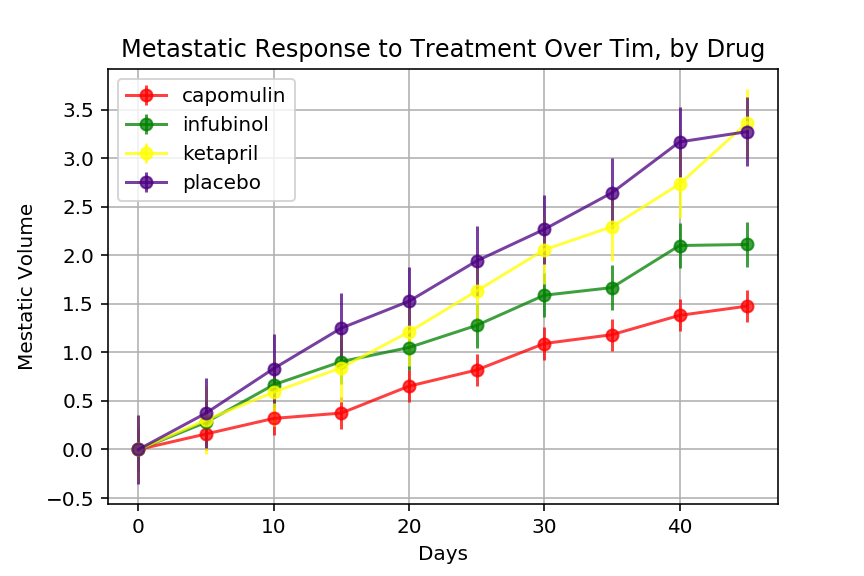

In [19]:
%matplotlib notebook

fig, ax = plt.subplots()
ax.errorbar(timepoint, capomulin_ms, standard_errors_capomulin_ms, marker="o", color="red", label = 'capomulin', alpha=0.75)
# ax.errorbar(timepoint, ceftamin_ms , standard_errors_ceftamin_ms, marker="o", color="blue", alpha=0.75)
ax.errorbar(timepoint, infubinol_ms , standard_errors_infubinol_ms, marker="o", color="green", label = 'infubinol', alpha=0.75)
ax.errorbar(timepoint, ketapril_ms , standard_errors_ketapril_ms, marker="o", color="yellow", label = 'ketapril', alpha=0.75)
# ax.errorbar(timepoint, naftisol_ms , standard_errors_naftisol_ms, marker="o", color="orange", alpha=0.75)
ax.errorbar(timepoint, placebo_ms , standard_errors_placebo_ms, marker="o", color="indigo", label = 'placebo', alpha=0.75)
# ax.errorbar(timepoint, propriva_ms , standard_errors_propriva_ms, marker="o", color="violet", alpha=0.75)
# ax.errorbar(timepoint, ramicane_ms , standard_errors_ramicane_ms, marker="o", color="grey", alpha=0.75)
# ax.errorbar(timepoint, stelasyn_ms , standard_errors_stelasyn_ms, marker="o", color="c0", alpha=0.75)
# ax.errorbar(timepoint, zoniferol_ms , standard_errors_zoniferol_ms, marker="o", color="c1", alpha=0.75)

plt.legend()
ax.grid(True)

ax.set_title('Metastatic Response to Treatment Over Tim, by Drug')
plt.xlabel('Days')
plt.ylabel('Mestatic Volume')

plt.show()

In [9]:
# Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint 

by_mice_time = merged_data_df.groupby(['Drug', 'Timepoint'])
by_mice_time.head()

summary_mice = by_ms_time['Mouse ID'].count()
summary_mice

summary_mice_df = pd.DataFrame(summary_mice)
summary_mice_df = summary_mice_df.reset_index()
summary_mice_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
loc_mice_capomulin = summary_mice_df.loc[summary_mice_df['Drug'] == 'Capomulin']
capomulin_mice = loc_mice_capomulin['Mouse ID']
standard_errors_capomulin_mice = capomulin_mice.sem()

# loc_mice_ceftamin = summary_mice_df.loc[summary_mice_df['Drug'] == 'Ceftamin']
# ceftamin_mice = loc_mice_ceftamin['Mouse ID']
# standard_errors_ceftamin_mice = ceftamin_mice.sem()

loc_mice_infubinol = summary_mice_df.loc[summary_mice_df['Drug'] == 'Infubinol']
infubinol_mice = loc_mice_infubinol['Mouse ID']
standard_errors_infubinol_mice = infubinol_mice.sem()

loc_mice_ketapril = summary_mice_df.loc[summary_mice_df['Drug'] == 'Ketapril']
ketapril_mice = loc_mice_ketapril['Mouse ID']
standard_errors_ketapril_mice = ketapril_mice.sem()

# loc_mice_naftisol = summary_mice_df.loc[summary_mice_df['Drug'] == 'Naftisol']
# naftisol_mice = loc_mice_naftisol['Mouse ID']
# standard_errors_naftisol_mice = naftisol_mice.sem()

loc_mice_placebo = summary_mice_df.loc[summary_mice_df['Drug'] == 'Placebo']
placebo_mice = loc_mice_placebo['Mouse ID']
standard_errors_placebo_mice = placebo_mice.sem()

# loc_mice_propriva = summary_mice_df.loc[summary_mice_df['Drug'] == 'Propriva']
# propriva_mice = loc_mice_propriva['Mouse ID']
# standard_errors_propriva_mice = propriva_mice.sem()

# loc_mice_ramicane = summary_mice_df.loc[summary_mice_df['Drug'] == 'Ramicane']
# ramicane_mice = loc_mice_ramicane['Mouse ID']
# standard_errors_ramicane_mice = ramicane_mice.sem()

# loc_mice_stelasyn = summary_mice_df.loc[summary_mice_df['Drug'] == 'Stelasyn']
# stelasyn_mice = loc_mice_stelasyn['Mouse ID']
# standard_errors_stelasyn_mice = stelasyn_mice.sem()

# loc_mice_zoniferol = summary_mice_df.loc[summary_mice_df['Drug'] == 'Zoniferol']
# zoniferol_mice = loc_mice_zoniferol['Mouse ID']
# standard_errors_zoniferol_mice = zoniferol_mice.sem()


<IPython.core.display.Javascript object>


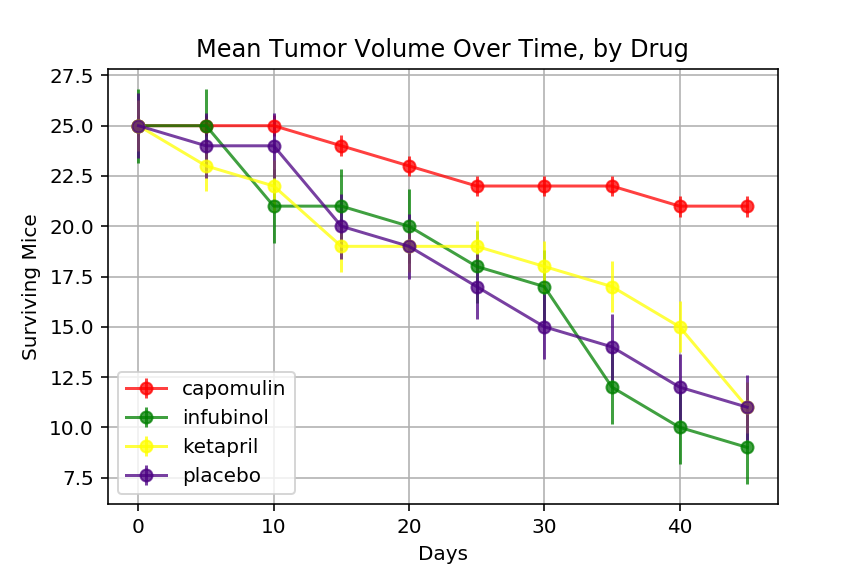

In [12]:
%matplotlib notebook

fig, ax = plt.subplots()
ax.errorbar(timepoint, capomulin_mice, standard_errors_capomulin_mice, marker="o", color="red", label = 'capomulin', alpha=0.75)
# ax.errorbar(timepoint, ceftamin_mice , standard_errors_ceftamin_mice, marker="o", color="blue", alpha=0.75)
ax.errorbar(timepoint, infubinol_mice , standard_errors_infubinol_mice, marker="o", color="green", label = 'infubinol', alpha=0.75)
ax.errorbar(timepoint, ketapril_mice , standard_errors_ketapril_mice, marker="o", color="yellow", label = 'ketapril', alpha=0.75)
# ax.errorbar(timepoint, naftisol_mice , standard_errors_naftisol_mice, marker="o", color="orange", alpha=0.75)
ax.errorbar(timepoint, placebo_mice , standard_errors_placebo_mice, marker="o", color="indigo", label = 'placebo', alpha=0.75)
# ax.errorbar(timepoint, propriva_mice , standard_errors_propriva_mice, marker="o", color="violet", alpha=0.75)
# ax.errorbar(timepoint, ramicane_mice , standard_errors_ramicane_mice, marker="o", color="grey", alpha=0.75)
# ax.errorbar(timepoint, stelasyn_mice , standard_errors_stelasyn_mice, marker="o", color="c0", alpha=0.75)
# ax.errorbar(timepoint, zoniferol_mice , standard_errors_zoniferol_mice, marker="o", color="c1", alpha=0.75)

ax.legend()
ax.grid(True)

plt.title('Mean Tumor Volume Over Time, by Drug')
plt.xlabel('Days')
plt.ylabel('Surviving Mice')

plt.show()

In [13]:
# Summary Bar Graph

In [14]:
loc_capomulin = summary_df.loc[summary_df['Drug'] == 'Capomulin']
capomulin = loc_capomulin['Tumor Volume (mm3)']
capomulin_prcnt = ((capomulin[9] - capomulin[0]) / capomulin[0])*100

# loc_ceftamin = summary_df.loc[summary_df['Drug'] == 'Ceftamin']
# ceftamin = loc_ceftamin['Tumor Volume (mm3)']
# ceftamin = list(ceftamin)
# ceftamin_prcnt = ((ceftamin[9] - ceftamin[0]) / ceftamin[0])*100

loc_infubinol = summary_df.loc[summary_df['Drug'] == 'Infubinol']
infubinol = loc_infubinol['Tumor Volume (mm3)']
infubinol = list(infubinol)
infubinol_prcnt = ((infubinol[9] - infubinol[0]) / infubinol[0])*100

loc_ketapril = summary_df.loc[summary_df['Drug'] == 'Ketapril']
ketapril = loc_ketapril['Tumor Volume (mm3)']
ketapril = list(ketapril)
ketapril_prcnt =((ketapril[9] - ketapril[0]) / ketapril[0])*100

# loc_naftisol = summary_df.loc[summary_df['Drug'] == 'Naftisol']
# naftisol = loc_naftisol['Tumor Volume (mm3)']
# naftisol = list(naftisol)
# naftisol_prcnt =((naftisol[9] - naftisol[0]) / naftisol[0])*100

loc_placebo = summary_df.loc[summary_df['Drug'] == 'Placebo']
placebo = loc_placebo['Tumor Volume (mm3)']
placebo = list(placebo)
placebo_prcnt = ((placebo[9] - placebo[0]) / placebo[0])*100

# loc_propriva = summary_df.loc[summary_df['Drug'] == 'Propriva']
# propriva = loc_propriva['Tumor Volume (mm3)']
# propriva = list(propriva)
# propriva_prcnt =((propriva[9] - propriva[0]) / propriva[0])*100

# loc_ramicane = summary_df.loc[summary_df['Drug'] == 'Ramicane']
# ramicane = loc_ramicane['Tumor Volume (mm3)']
# ramicane = list(ramicane)
# ramicane_prcnt = ((ramicane[9] - ramicane[0]) / ramicane[0])*100

# loc_stelasyn = summary_df.loc[summary_df['Drug'] == 'Stelasyn']
# stelasyn = loc_stelasyn['Tumor Volume (mm3)']
# stelasyn = list(stelasyn)
# stelasyn_prcnt = ((stelasyn[9] - stelasyn[0]) / stelasyn[0])*100

# loc_zoniferol = summary_df.loc[summary_df['Drug'] == 'Zoniferol']
# zoniferol = loc_zoniferol['Tumor Volume (mm3)']
# zoniferol = list(zoniferol)
# zoniferol_prcnt =((zoniferol[9] - zoniferol[0]) / zoniferol[0])*100


In [15]:
bar_df = pd.DataFrame({
    'capomulin': [capomulin_prcnt],
#     'ceftamin': [ceftamin_prcnt],
    'infubinol': [infubinol_prcnt],
    'ketapril': [ketapril_prcnt],
#     'naftisol': [naftisol_prcnt],
    'placebo': [placebo_prcnt],
#     'propriva': [propriva_prcnt],
#     'ramicane': [ramicane_prcnt],
#     'stelasyn': [stelasyn_prcnt],
#     'zoniferol': [zoniferol_prcnt]
})

bar_df = round(bar_df, 2)

<IPython.core.display.Javascript object>


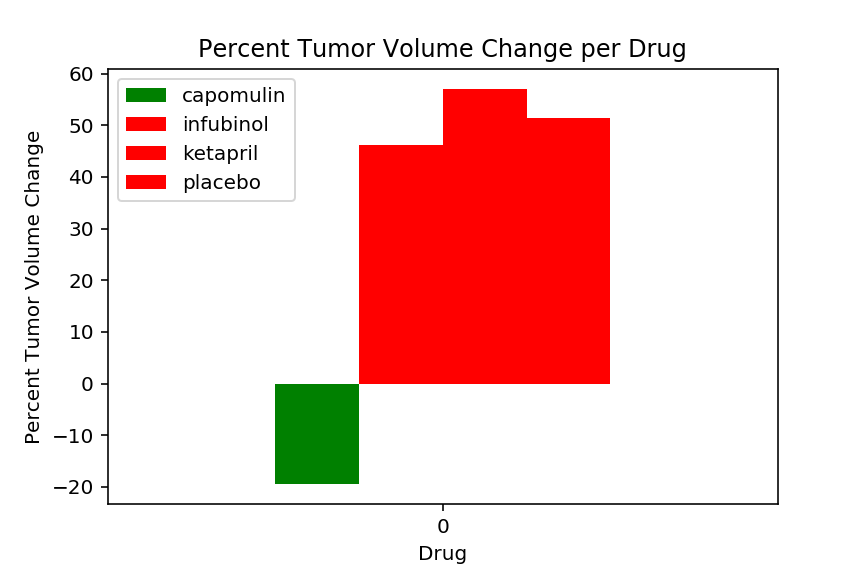

Text(0,0.5,'Percent Tumor Volume Change')

In [16]:
bar_graph = bar_df.plot.bar(color = ['green', 'red', 'red', 'red'], rot=0)

plt.title('Percent Tumor Volume Change per Drug')
plt.xlabel('Drug')
plt.ylabel('Percent Tumor Volume Change')


In [17]:
# Three observable trends based on the data:
    
#     1) Capomulin and Ramicane were the only drugs to succesfully shrink the mean tumor volume over time.
#     2) The mean metastatic site value incresed for all mice over time. 
#     3) Over the course of the study, no drug returned a 100% survival rate. 
